In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data, city_data, on=["city"], how="outer")

# Display the data table for preview
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

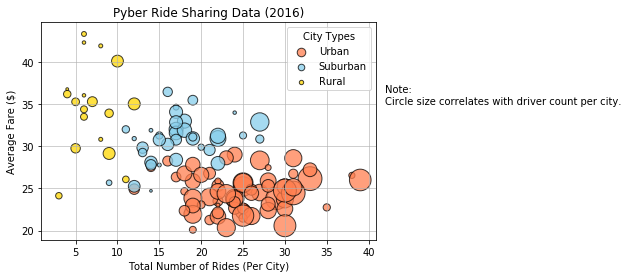

In [2]:
# Obtain the x and y coordinates for each of the three city types
urban_type = city_ride_data.loc[city_ride_data['type'] == "Urban"]
urban_type_2 = urban_type.groupby('city')
urban_city_drivers = urban_type_2['driver_count'].sum()
urban_city_fare = urban_type_2['fare'].mean()
urban_city_trips = urban_type_2['ride_id'].count()

suburban_type = city_ride_data.loc[city_ride_data['type'] == "Suburban"]
suburban_type_2 = suburban_type.groupby('city')
suburban_city_drivers = suburban_type_2['driver_count'].sum()
suburban_city_fare = suburban_type_2['fare'].mean()
suburban_city_trips = suburban_type_2['ride_id'].count()

rural_type = city_ride_data.loc[city_ride_data['type'] == "Rural"]
rural_type_2 = rural_type.groupby('city')
rural_city_drivers = rural_type_2['driver_count'].sum()
rural_city_fare = rural_type_2['fare'].mean()
rural_city_trips = rural_type_2['ride_id'].count()

# Build the scatter plots for each city types
plt.scatter(urban_city_trips, urban_city_fare, s=urban_city_drivers * .25, marker="o", facecolors="coral", alpha=0.75, edgecolors="black", label="Urban")
plt.scatter(suburban_city_trips, suburban_city_fare, s=suburban_city_drivers * .5, marker="o", facecolors="skyblue", alpha=0.75, edgecolors="black", label="Suburban")
plt.scatter(rural_city_trips, rural_city_fare, s=rural_city_drivers * 2, marker="o", facecolors="gold", alpha=0.75, edgecolors="black", label="Rural")

# Incorporate the other graph properties
plt.grid(alpha=0.75)
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.title('Pyber Ride Sharing Data (2016)')

# Create a legend
plt.legend(scatterpoints=1, frameon=True, labelspacing=.5, title='City Types', markerscale=.5)

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.", ha='left')

# Save Figure
plt.savefig("PyberBubbleChart.png", bbox_inches = "tight")

# Show Plot
plt.show()

## Total Fares by City Type

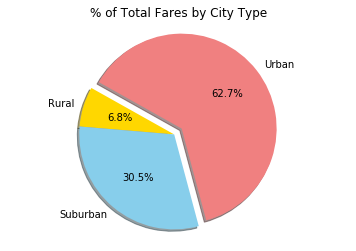

In [3]:
# Calculate Type Percents
total_fare = city_ride_data["fare"].sum()
urban_fare_pct = round(((urban_type["fare"].sum() / total_fare) * 100), 1)
suburban_fare_pct = round(((suburban_type["fare"].sum() / total_fare) * 100), 1)
rural_fare_pct = round(((rural_type["fare"].sum() / total_fare) * 100), 1)

fare_pct = [urban_fare_pct, rural_fare_pct, suburban_fare_pct]
fare_labels = ["Urban", "Rural", "Suburban"]
fare_colors = ["lightcoral", "gold", "skyblue"]
explode = [0.1, 0, 0]

# Build Pie Chart
plt.pie(fare_pct, explode=explode, labels=fare_labels, colors=fare_colors,
        autopct="%1.1f%%", shadow=True, startangle=285)
plt.title("% of Total Fares by City Type")
plt.axis("Equal")

# Save Figure
plt.savefig("TotalFares.png", bbox_inches = "tight")

# Show Plot
plt.show()

## Total Rides by City Type

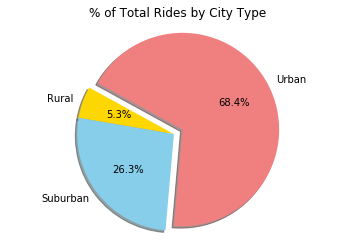

In [4]:
# Calculate Ride Percents
total_rides = city_ride_data["ride_id"].count()
urban_rides_pct = round(((urban_type["ride_id"].count() / total_rides) * 100), 1)
suburban_rides_pct = round(((suburban_type["ride_id"].count() / total_rides) * 100), 1)
rural_rides_pct = round(((rural_type["ride_id"].count() / total_rides) * 100), 1)

rides_pct = [urban_rides_pct, rural_rides_pct, suburban_rides_pct]
rides_labels = ["Urban", "Rural", "Suburban"]
rides_colors = ["lightcoral", "gold", "skyblue"]
explode = [0.1, 0, 0]

# Build Pie Chart
plt.pie(rides_pct, explode=explode, labels=rides_labels, colors=rides_colors,
        autopct="%1.1f%%", shadow=True, startangle=265)
plt.title("% of Total Rides by City Type")
plt.axis("Equal")

# Save Figure
plt.savefig("TotalRides.png", bbox_inches = "tight")

# Show Plot
plt.show()

## Total Drivers by City Type

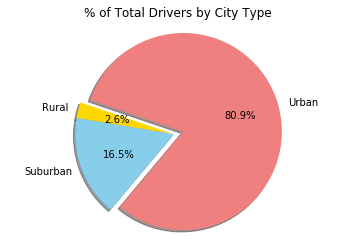

In [5]:
# Calculate Driver Percents
urban_city = city_data.loc[city_data['type'] == "Urban"]
suburban_city = city_data.loc[city_data['type'] == "Suburban"]
rural_city = city_data.loc[city_data['type'] == "Rural"]
total_drivers = city_data["driver_count"].sum()
urban_drivers_pct = round(((urban_city["driver_count"].sum() / total_drivers) * 100), 1)
suburban_drivers_pct = round(((suburban_city["driver_count"].sum() / total_drivers) * 100), 1)
rural_drivers_pct = round(((rural_city["driver_count"].sum() / total_drivers) * 100), 1)

drivers_pct = [urban_drivers_pct, rural_drivers_pct, suburban_drivers_pct]
drivers_labels = ["Urban", "Rural", "Suburban"]
drivers_colors = ["lightcoral", "gold", "skyblue"]
explode = [0.1, 0, 0]

# Build Pie Chart
plt.pie(drivers_pct, explode=explode, labels=drivers_labels, colors=drivers_colors,
        autopct="%1.1f%%", shadow=True, startangle=230)
plt.title("% of Total Drivers by City Type")
plt.axis("Equal")

# Save Figure
plt.savefig("TotalDrivers.png", bbox_inches = "tight")

# Show Plot
plt.show()